## 20.6.2023

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("./housing_example.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'area_meters'],
      dtype='object')

In [74]:
df.shape

(545, 13)

In [75]:
df['area_meters'] = df['area']/10.764

In [76]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking,area_meters
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578,478.496961
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586,201.611020
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,153.288740
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,334.448161
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,427.350427
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,590.858417
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000,1505.016722


In [78]:
mapping = {'yes': True, 'no': False}
df = df.replace(mapping)

In [81]:
df = df.drop('area', axis=1)
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_meters
0,13300000,4,2,3,True,False,False,False,True,2,True,furnished,689.334820
1,12250000,4,4,4,True,False,False,False,True,3,False,furnished,832.404311
2,12250000,3,2,2,True,False,True,False,False,2,True,semi-furnished,925.306577
3,12215000,4,2,2,True,False,True,False,True,3,True,furnished,696.767001
4,11410000,4,1,2,True,True,True,False,True,2,False,furnished,689.334820


In [105]:
df_transform = pd.get_dummies(df)
df = df_transform
df.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,area_meters,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,4,2,3,True,False,False,False,True,2,True,689.334820,True,False,False
1,12250000,4,4,4,True,False,False,False,True,3,False,832.404311,True,False,False
2,12250000,3,2,2,True,False,True,False,False,2,True,925.306577,False,True,False
3,12215000,4,2,2,True,False,True,False,True,3,True,696.767001,True,False,False
4,11410000,4,1,2,True,True,True,False,True,2,False,689.334820,True,False,False


In [162]:
# cistenie dat

columns_to_check = ['price', 'area_meters', 'bedrooms']
       
for col in columns_to_check:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [163]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'area_meters', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [174]:
df.loc[245].values

array([4550000, 3, 1, 2, True, False, False, False, False, 2, True,
       497.9561501300632, False, False, True], dtype=object)

In [165]:
y = df[['price']] #vytvaranie datafram do premennej
# X = df[['area_meters']]
# X = df[['area_meters', 'bedrooms']]
X = df[['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'area_meters', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']]

In [166]:
model = LinearRegression()
model.fit(X=X, y=y)

LinearRegression()

In [167]:
print('from scikit-learn:')
print('intercept:', model.intercept_)
print('coef:', model.coef_)

from scikit-learn:
intercept: [714123.3868665]
coef: [[  35194.80023988  681177.53744613  427236.53660547  388855.1041814
   272847.29582853  244924.93286912  421346.86382215  685493.67799247
   111922.84411034  560954.214764      2472.33679638   91318.05575526
   171596.20021635 -262914.2559716 ]]


In [175]:
target = [3, 1, 2, True, False, False, False, False, 2, True,
       497.9561501300632, False, False, True]
predict_data = np.array([target])
model.predict(predict_data)

c:\Users\maro-personal\Documents\KurzDataScience\.venv\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4497214.46238942]])

## Moje nezmysly

<Axes: xlabel='bedrooms', ylabel='area_meters'>

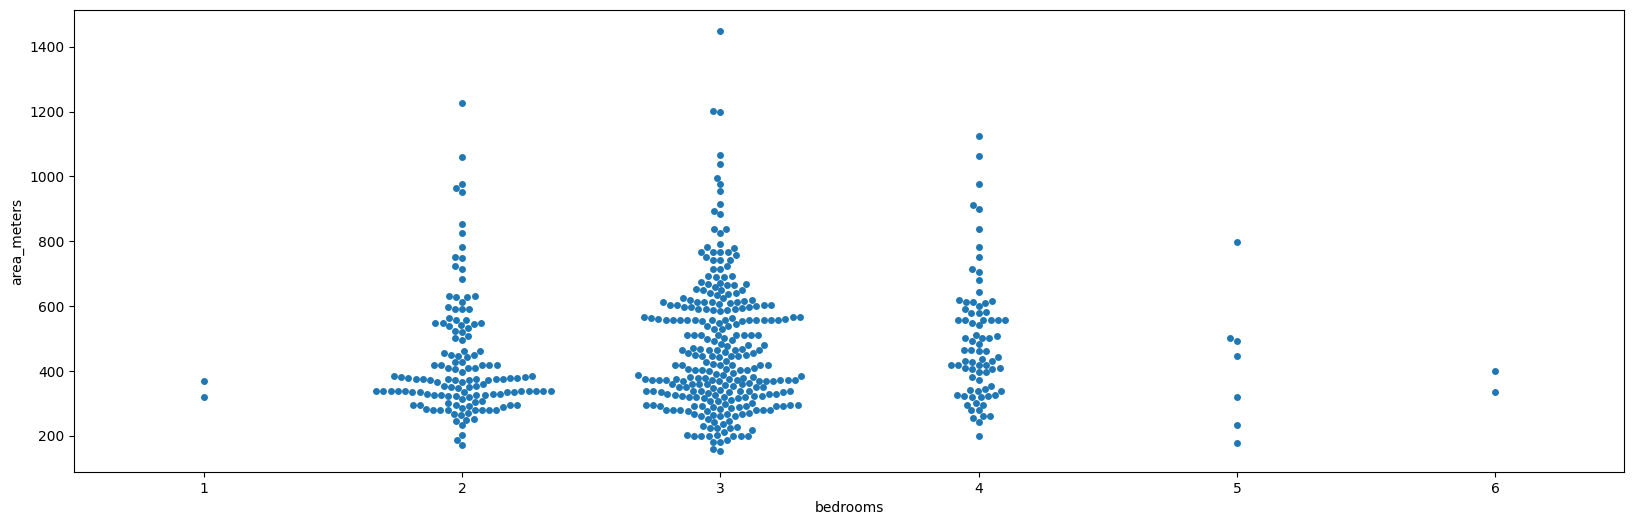

In [161]:
plt.figure(figsize=(20,6))
sns.swarmplot(x='bedrooms', y='area_meters', data=df)

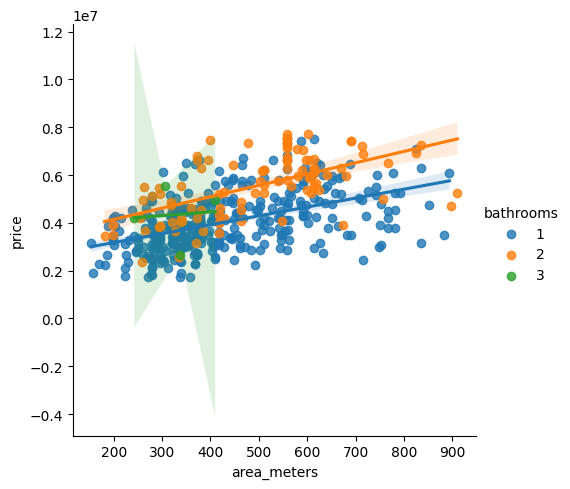

In [169]:
sns.lmplot(x='area_meters', y='price', data=df, fit_reg=True, hue='bathrooms')

In [170]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'area_meters', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

<Axes: >

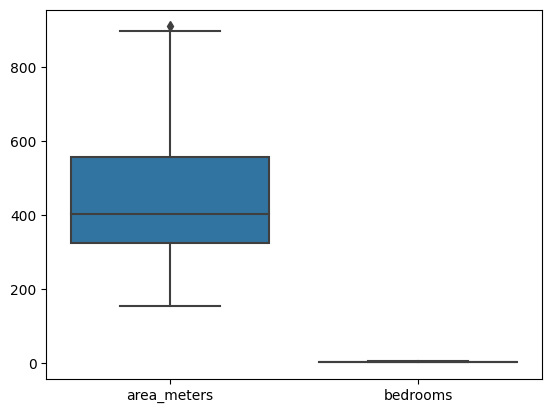

In [173]:
sns.boxplot(data=df[['area_meters', 'bedrooms']])